In [285]:
import numpy as np
from string import punctuation
import os
import pandas as pd
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression

# 1. Read Data and Data Overview

Read the data mxm.csv and seasonal_telecast_ratings.csv into dataframe mxm_raw and sea_raw. Look at some basic information of these two dataframes.

For data mxm.csv

In [125]:
#read the mxm.csv data into dataframe mxm_raw
mxm_raw = pd.read_csv("./mxm.csv")
#rename the first column name
mxmc = np.append(np.array(['index']) , mxm_raw.columns.values[1:])
mxm_raw.columns = mxmc

In [349]:
#look at the first 3 entries of mxm
mxm_raw.head(3)

,index,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc
0,0,DKN,2015-09-21,10:00 PM,BLACK_S_BOT,60,3.735534,0,15.637767
1,1,DKN,2015-09-21,10:01 PM,BLACK_S_BOT,60,3.528162,0,5.965321
2,2,DKN,2015-09-21,10:02 PM,BLACK_S_BOT,60,3.540440,0,6.501681


In [350]:
#look at the last 3 entries of mxm
mxm_raw.tail(3)

,index,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc
2085,2085,DKN,2017-01-18,08:57 PM,BLACK_S_BOT,60,1.144203,0,1.854381
2086,2086,DKN,2017-01-18,08:58 PM,BLACK_S_BOT,60,1.177919,0,1.782612
2087,2087,DKN,2017-01-18,08:59 PM,BLACK_S_BOT,60,1.251851,1,0.000000


In [128]:
#mxm overview
mxm_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,2088.0,1043.500000,602.898001,0.000000,521.750000,1043.500000,1565.250000,2087.000000
Length,2088.0,59.660920,0.473511,59.000000,59.000000,60.000000,60.000000,60.000000
Rating,2088.0,1.706287,0.469426,0.955006,1.372028,1.552339,1.963901,3.831234
Minute_In_Commercial,2088.0,0.347222,0.476201,0.000000,0.000000,0.000000,1.000000,1.000000
Total_Loss_perc,2088.0,3.416686,3.147592,0.000000,1.776482,2.548101,3.823660,29.634020


We can see that the length of the episode of Mr. Bl@ck.s.bot are approximately the same. The ratings, however, has been very high at some time points.

In [129]:
#mxm data information
mxm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 9 columns):
index                   2088 non-null int64
Network                 2088 non-null object
Date                    2088 non-null object
Time                    2088 non-null object
Program                 2088 non-null object
Length                  2088 non-null int64
Rating                  2088 non-null float64
Minute_In_Commercial    2088 non-null int64
Total_Loss_perc         2088 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 146.9+ KB


For data seasonal_telecast_ratings.csv

In [169]:
#read the seasonal_telecast_ratings.csv data into dataframe sea_raw
sea_raw = pd.read_csv("./seasonal_telecast_ratings.csv")
#rename the column name
seac = np.append(np.array(['index']) , sea_raw.columns.values[1:9])
seac= np.append(seac, np.array(['Rating']))
sea_raw.columns = seac

In [177]:
#look at the first 3 entries of mxm
sea_raw.head(3)

,index,show_name,network,genre,time_slot,program_start_time,program_duration,show_premier,show_repeat,Rating
0,0,OF WOLVES AND MAN,JGN,Drama,2015-09-20 20:00:00,2015-09-20 20:00:00,3600,0,1,0.006776
1,1,OF WOLVES AND MAN,JGN,Drama,2015-09-20 21:00:00,2015-09-20 21:00:00,7200,0,1,0.005118
2,2,OF WOLVES AND MAN,JGN,Drama,2015-09-27 20:00:00,2015-09-27 20:00:00,3600,1,0,0.021757
3,3,OF WOLVES AND MAN,JGN,Drama,2015-10-04 20:00:00,2015-10-04 20:00:00,3600,0,0,0.018664
4,4,OF WOLVES AND MAN,JGN,Drama,2015-10-11 20:00:00,2015-10-11 20:00:00,3600,0,0,0.016884


In [171]:
#mxm overview
sea_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,4598.0,2298.500000,1327.472599,0.000000,1149.250000,2298.500000,3447.750000,4597.000000
program_duration,4598.0,3239.438886,1356.142894,240.000000,1800.000000,3600.000000,3600.000000,10800.000000
show_premier,4598.0,0.082862,0.275704,0.000000,0.000000,0.000000,0.000000,1.000000
show_repeat,4598.0,0.308395,0.461881,0.000000,0.000000,0.000000,1.000000,1.000000
Rating,4598.0,0.017389,0.010270,0.001711,0.009592,0.015021,0.023137,0.063658


We can see that the average rating of the all the programs is much lower than the show Mr. Bl@ck.s.bot

In [172]:
#mxm data information
sea_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 10 columns):
index                 4598 non-null int64
show_name             4593 non-null object
network               4598 non-null object
genre                 4598 non-null object
time_slot             4598 non-null object
program_start_time    4598 non-null object
program_duration      4598 non-null int64
show_premier          4598 non-null int64
show_repeat           4598 non-null int64
Rating                4598 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 359.3+ KB


# 2. Data Preprocessing and Aggregation

Data Preprocessing:
1. Convert the time string to standard datetime format and only keep the date information.
2. Build two more columns(month and year)to indicate the month and year of the entry.
3. Build a new data frame sea_trimmed with sea, but with all the dates not in the mxm filteres out. That is to say, sea_trimmed contains only the entries whose Date corresponds with those in mxm. The purpose of building sea_trimmed is to obtain the influence of schduling to the ratings of the show.

In [413]:
def DataPreprocessing(df,timelist):
    '''
    df: DataFrame to be preprocessed
    timelist: list of strings, columns need to be converted
    '''
    for time in timelist:
        #convert the time string to standard datetime format and only keep the date information.
        df[time] = [pd.to_datetime(d) for d in df[time]]
        df[time] = [d.date() for d in df[time]]
        #Build two more columns(month and year)to indicate the month and year of the entry.
        df['month'] = [d.month for d in df[time]]
        df['year'] = [d.year for d in df[time]]
    return df
    
mxm = DataPreprocessing(mxm_raw,['Date'])
sea = DataPreprocessing(sea_raw,['time_slot'])

In [414]:
#build a new data frame sea_trimmed with sea, but with all the dates not in the mxm filteres out.
i1 = sea.set_index('time_slot').index
i2 = mxm.set_index('Date').index
sea_trimmed = sea[i1.isin(i2)]


Data Aggregation: Aggregate max, sea and sea_trimmed on the date of the entry. The aggregatted dataframe represents the average rating of Mr. Bl@ck.s.bot on each day. 

In [415]:
#Aggregate max, sea and sea_trimmed on the date of the entry. 
#The aggregatted dataframe represents the average rating of Mr. Bl@ck.s.bot on each day. 
mxm_agg = pd.DataFrame(mxm.groupby('Date').mean())
sea_trimmed_agg = pd.DataFrame(sea_trimmed.groupby('time_slot').mean())
sea_agg = pd.DataFrame(sea.groupby('time_slot').mean())

# 3. Model Building

Build linear model to determine the factors affecting ratings. Discover the relationship between ratings and show features including network, genre, program duration, whether it is premier, whether it is repeat, and of course, the scheduling of the show. We got everything except for the 

In [416]:
data = sea



In [417]:
#drop the columns 'index','show_name', 'time_slot', 'program_start_time', 'Date' that we are not interested 
#or we already have infomation of those in other columns
data = data.drop(['index','show_name', 'time_slot', 'program_start_time', 'Date'], axis=1)


In [419]:
#convert the 'month','year','genre','network' columns to dummy variables
data.sort_values(by=['month'])
data = pd.get_dummies(data, prefix = ['month','year','genre','network'], columns = ['month','year','genre','network'])

In [420]:
#look at the last 5 entries of the data
data.head(5)

,program_duration,show_premier,show_repeat,Rating,month_1,month_2,month_3,month_4,month_5,month_6,...,year_2016,year_2017,genre_Animation,genre_Comedy,genre_Drama,genre_Other,network_DKN,network_JGBC,network_JGN,network_PNN
0,3600,0,1,0.006776,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,7200,0,1,0.005118,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3600,1,0,0.021757,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3600,0,0,0.018664,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,3600,0,0,0.016884,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [421]:
#look at the correlation coefficient of the attributes of the data.
data.corr()

,program_duration,show_premier,show_repeat,Rating,month_1,month_2,month_3,month_4,month_5,month_6,...,year_2016,year_2017,genre_Animation,genre_Comedy,genre_Drama,genre_Other,network_DKN,network_JGBC,network_JGN,network_PNN
program_duration,1.000000,0.023094,-0.155503,0.238894,-0.015880,-0.008093,0.010565,-0.010653,0.008708,0.046679,...,0.004103,-0.024496,-0.255475,-0.651200,0.276612,0.513597,0.264266,-0.031011,-0.080706,-0.125718
show_premier,0.023094,1.000000,-0.038433,0.029005,0.033169,-0.032561,-0.003186,-0.050470,-0.024652,0.062791,...,-0.013197,0.005967,0.015563,0.007926,-0.029973,0.018986,0.002001,-0.022373,-0.017108,0.040219
show_repeat,-0.155503,-0.038433,1.000000,-0.387678,-0.063941,-0.094943,-0.055702,-0.056686,-0.076325,0.135847,...,0.046032,-0.072456,0.102042,0.096332,-0.089592,-0.051922,-0.096222,0.058422,-0.022462,0.048556
Rating,0.238894,0.029005,-0.387678,1.000000,0.046754,0.035410,0.036300,0.023238,0.005482,-0.093954,...,-0.096717,0.018740,-0.211308,-0.093762,0.146996,0.038616,0.068726,0.407604,-0.087782,-0.414196
month_1,-0.015880,0.033169,-0.063941,0.046754,1.000000,-0.091716,-0.098449,-0.098785,-0.095729,-0.084394,...,-0.140732,0.652406,-0.008205,0.043700,-0.023198,-0.015394,0.006070,0.002900,0.007374,-0.016402
month_2,-0.008093,-0.032561,-0.094943,0.035410,-0.091716,1.000000,-0.068283,-0.068516,-0.066397,-0.058535,...,0.158096,-0.059836,0.024164,-0.006686,0.018666,-0.027974,0.021145,-0.016916,-0.021415,0.021153
month_3,0.010565,-0.003186,-0.055702,0.036300,-0.098449,-0.068283,1.000000,-0.073546,-0.071271,-0.062832,...,0.169702,-0.064229,-0.031917,-0.010303,0.046556,-0.027547,0.041085,-0.042037,0.014186,-0.006968
month_4,-0.010653,-0.050470,-0.056686,0.023238,-0.098785,-0.068516,-0.073546,1.000000,-0.071515,-0.063047,...,0.170281,-0.064448,0.002769,-0.017072,0.018927,-0.005573,0.022568,-0.013246,-0.006333,0.000180
month_5,0.008708,-0.024652,-0.076325,0.005482,-0.095729,-0.066397,-0.071271,-0.071515,1.000000,-0.061096,...,0.165014,-0.062454,0.018538,-0.021215,0.003407,0.009123,0.021841,0.006553,-0.022890,-0.003414
month_6,0.046679,0.062791,0.135847,-0.093954,-0.084394,-0.058535,-0.062832,-0.063047,-0.061096,1.000000,...,0.145475,-0.055059,-0.013904,-0.015105,-0.042067,0.074259,-0.013657,0.033783,-0.023807,0.000676


In [422]:
#split data into train dataset and test dataset≤
X = data.drop('Rating', 1)
Y =  data['Rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)



In [423]:
#build linear model
lr = LinearRegression()
lr.fit(X_train, Y_train)

print("the R square score for the model is "+str(lr.score(X_train, Y_train))+'\n')
coef = pd.DataFrame(lr.coef_, index = X_train.columns.values, columns=['coefficient'])
print('the coefficient of the linear regression model is \n'+str(coef))
preds_lr = lr.predict(X_test)
mse = np.mean((Y_test - preds_lr)**2)
print('the mse of the prediction of the test dataset is '+str(mse))

the R square score for the model is 0.457040110588

the coefficient of the linear regression model is 
                  coefficient
program_duration     0.000002
show_premier         0.001084
show_repeat         -0.007064
month_1              0.001776
month_2              0.001459
month_3              0.001808
month_4              0.001255
month_5             -0.000132
month_6             -0.002772
month_7             -0.003158
month_8             -0.003252
month_9             -0.000201
month_10             0.001812
month_11             0.001234
month_12             0.000170
year_2015            0.001462
year_2016           -0.000212
year_2017           -0.001250
genre_Animation      0.001281
genre_Comedy         0.000979
genre_Drama         -0.001618
genre_Other         -0.000642
network_DKN          0.000047
network_JGBC         0.007652
network_JGN         -0.001163
network_PNN         -0.006536
the mse of the prediction of the test dataset is 5.2352940519849864e-05


From the correlation analysis and the linear regression, We can see that ratings of the show will suffer a lot if the show is repeated. The genre matters to the ratings. Animation and Comedy tends to have better ratings than Drama and Other. The influence of the network on the ratings are negligible. 

The Schduling of the program matters to the ratings. The programs in January, October, November tend to perform better than those in June, July and August.

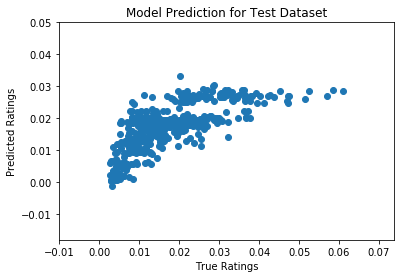

In [384]:
plt.scatter(Y_test, preds_lr)
plt.xlabel("True Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Model Prediction for Test Dataset")
plt.show()

# 4. Data Visulization and Analysis

We try to visulize both the raw data(both seasonal telecast ratings and ratings for Mr. Bl@ck.s.bot) and the aggregated data (aggregated by month). Through visualization, we try to find out the primary driver for weak ratings for the second season and test the hypothsis made by the producers.

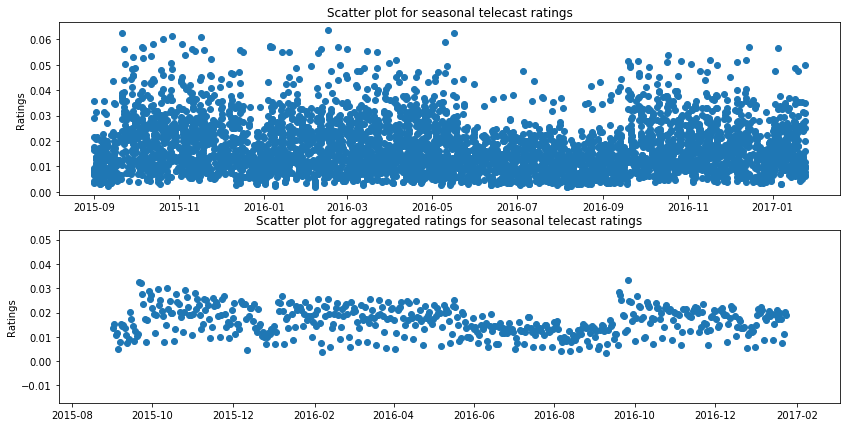

In [430]:
plt.figure(figsize=(14, 7))
plt.subplot(211)
plt.plot_date(sea['Date'], sea['Rating'])
plt.title("Scatter plot for seasonal telecast ratings")

plt.ylabel("Ratings")
plt.subplot(212)
plt.title("Scatter plot for aggregated ratings for seasonal telecast ratings")
plt.scatter(sea_agg.index, sea_agg['Rating'])

plt.ylabel("Ratings")
plt.show()


    



The above first plot shows the ratings on different time points for all programs. And the second plot shows the aggregated ratings on different time points. The plots verify the results from the model that the programs in January, October, November tend to perform better than those in June, July and August.

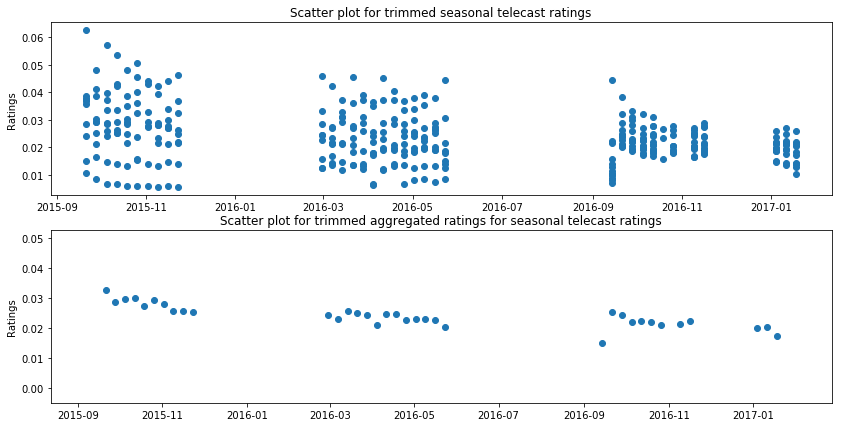

In [431]:
plt.figure(figsize=(14, 7))
plt.subplot(211)
plt.plot_date(sea_trimmed['Date'], sea_trimmed['Rating'])
plt.title("Scatter plot for trimmed seasonal telecast ratings")

plt.ylabel("Ratings")
plt.subplot(212)
plt.scatter(sea_trimmed_agg.index, sea_trimmed_agg['Rating'])
plt.title("Scatter plot for trimmed aggregated ratings for seasonal telecast ratings")
plt.ylabel("Ratings")
plt.show()



Trimmed seasonal telecast ratings contains only the entries whose Date corresponds with ratings for Mr. Bl@ck.s.bot). The above two plots shows the influence of scheduling on the ratings for Mr. Bl@ck.s.bot. As we can see, the scheduling has a negative influence to the later episodes of season 1 of Mr. Bl@ck.s.bot and the first episode of season 2 of Mr. Bl@ck.s.bot.

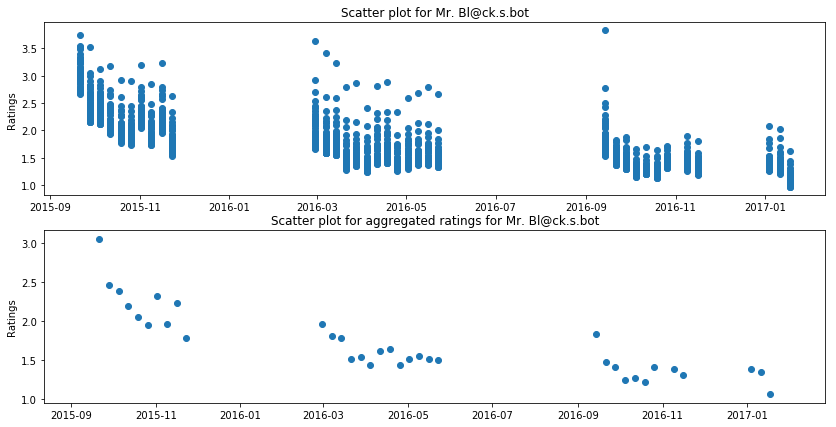

In [432]:
plt.figure(figsize=(14, 7))
plt.subplot(211)
plt.plot_date(mxm['Date'], mxm['Rating'])
plt.title("Scatter plot for Mr. Bl@ck.s.bot")

plt.ylabel("Ratings")
plt.subplot(212)
plt.scatter(mxm_agg.index, mxm_agg['Rating'])
plt.title("Scatter plot for aggregated ratings for Mr. Bl@ck.s.bot")
plt.ylabel("Ratings")
plt.show()

The above two plots show the change of ratings of Mr. Bl@ck.s.bot. However, we should get rid of the influence of scheduling if we want to find out the relationship of the ratings and the episodes themselves. We try to combine the information of both datesets to calculate the score for each episodes of Mr. Bl@ck.s.bot. The score is obtained by divide the aggregated ratings of Mr. Bl@ck.s.bot by the aggregated ratings of all programs for each day. The score shows the goodness of the episodes without the influence of the schduling of the show.

In [433]:
score = mxm_agg['Rating']/sea_trimmed_agg['Rating']
print(score)

Date
2015-09-21     93.289009
2015-09-28     85.367770
2015-10-05     80.821312
2015-10-12     73.292596
2015-10-19     74.560267
2015-10-26     66.302507
2015-11-02     82.837190
2015-11-09     76.434269
2015-11-16     86.585891
2015-11-23     70.172439
2016-02-29     80.173163
2016-03-07     78.658077
2016-03-14     69.443654
2016-03-21     60.482618
2016-03-28     63.055128
2016-04-04     68.387345
2016-04-11     65.390909
2016-04-18     66.093490
2016-04-25     63.905424
2016-05-02     65.740442
2016-05-09     67.848264
2016-05-16     66.667863
2016-05-23     73.570847
2016-09-14    120.887746
2016-09-21     58.538665
2016-09-28     58.292731
2016-10-05     56.476916
2016-10-12     56.919503
2016-10-19     55.901153
2016-10-26     66.794251
2016-11-09     64.629405
2016-11-16     58.731156
2017-01-04     70.018599
2017-01-11     65.857831
2017-01-18     62.011451
Name: Rating, dtype: float64


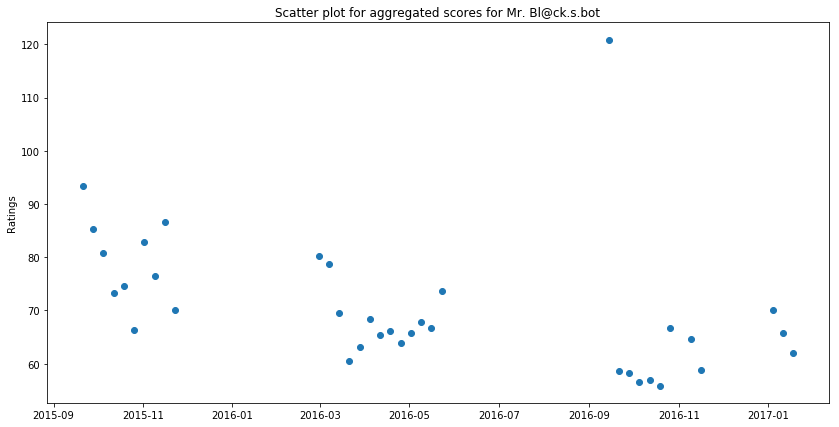

In [435]:
plt.figure(figsize=(14, 7))
plt.plot_date(mxm_agg.index, score)
plt.title("Scatter plot for aggregated scores for Mr. Bl@ck.s.bot")
plt.ylabel("Ratings")
plt.show()

From 2015-10 to 2015-12 is the first season of Mr. Bl@ck.s.bot. We can see that the scores are highest for the first episode then go down in the next 5 episodes, which indicate audiance start to lose interest in the episodes 2,3,4,5 and 6. However, the scores of the show bound back at episode 7 and episode 9, and went down again at episodes 8 and 10. It is worth noting that the fall on episode 10 is comparatively very big. First season of Mr. Bl@ck.s.bot aired again from 2016-03 to 2016-6. 

From 2016-09 to 2016-12 is the second season of Mr. Bl@ck.s.bot. We can see that the first score for the first episode is very high, but go down quickly in the next few episodes. 

It should be noted that the score for the episode is high does not only mean the episode itself is good, it could also mean that one episode before that episode is good. Same goes for the bad score.

# 5. Conclusions and Recommendations

According to the data, we can come to the following conclusions:

1. For the first season of Mr. Bl@ck.s.bot, audience actually start to leave Mr. Bl@ck.s.bot from episodes 2 to 5. However, episode 6 to episode 9 was good enough to win audience back for a little while. The hypothsis that the audience start to leave at episode 8 is not verified by the data

2. For the second season of Mr. Bl@ck.s.bot, audience is very interested in the first episode of the show. This means that the ending episode of the first season is good. However, they left fast after the first episode, which indictes that the first episode of the second season does not intrigue audience to continue watching Mr. Bl@ck.s.bot.

3. The scheduling of the show does affect the ratings of the show. The programs in January, October, November tend to perform better than those in June, July and August.

4. The genre of the program is another factor that determines the ratings. Animation and Comedy tends to have better ratings than Drama and Other. The influence of the network on the ratings are negligible. 

5. Repeated program will have a much worse ratings that the non-repeated program.



Recommendations: Instead of blaming the last episode of the first season, the producer should spend more effots looking into the first episode of the second season to find out the reasons why audience left. Also, the producer can look at episodes 6 to 10 to find out the reasons why they succeed and apply them to the next season of Mr. Bl@ck.s.bot. I personally are very looking forward to season 3 of Mr. Bl@ck.s.bot. I sincerely wish the recommendation could help the show. 
